In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers=pd.read_csv('/content/Customers.csv')
products=pd.read_csv('/content/Products.csv')
transactions=pd.read_csv('/content/Transactions.csv')

In [4]:
data = pd.merge(customers, transactions, on='CustomerID')

In [5]:
data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


In [6]:
customer_data = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean',
    'Region': 'first',
}).reset_index()

In [7]:
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

In [8]:
customer_data

,CustomerID,TotalValue,Quantity,Price,Region_Europe,Region_North America,Region_South America
0,C0001,3354.52,12,278.334000,False,False,True
1,C0002,1862.74,10,208.920000,False,False,False
2,C0003,2725.38,14,195.707500,False,False,True
3,C0004,5354.88,23,240.636250,False,False,True
4,C0005,2034.24,7,291.603333,False,False,False
...,...,...,...,...,...,...,...
194,C0196,4982.88,12,416.992500,True,False,False
195,C0197,1928.65,9,227.056667,True,False,False
196,C0198,931.83,3,239.705000,True,False,False
197,C0199,1979.28,9,250.610000,True,False,False


In [9]:
customer_profiles = data.groupby("CustomerID").agg({
    "Quantity": "sum",
    "TotalValue": "sum",
    "Region": "first"
}).reset_index()

In [10]:
customer_profiles.head(5)

,CustomerID,Quantity,TotalValue,Region
0,C0001,12,3354.52,South America
1,C0002,10,1862.74,Asia
2,C0003,14,2725.38,South America
3,C0004,23,5354.88,South America
4,C0005,7,2034.24,Asia


In [11]:
customer_profiles = pd.get_dummies(customer_profiles, columns=["Region"], drop_first=True)

In [12]:
customer_profiles.head(5)

,CustomerID,Quantity,TotalValue,Region_Europe,Region_North America,Region_South America
0,C0001,12,3354.52,False,False,True
1,C0002,10,1862.74,False,False,False
2,C0003,14,2725.38,False,False,True
3,C0004,23,5354.88,False,False,True
4,C0005,7,2034.24,False,False,False


In [13]:
scaler = StandardScaler()

In [14]:
scaler

StandardScaler()

In [15]:
features = customer_profiles.drop(columns=["CustomerID"])
normalized_features = scaler.fit_transform(features)

In [16]:
normalized_features.shape


(199, 5)

In [17]:
np.isnan(normalized_features).any()

False

In [18]:
np.isinf(normalized_features).any()

False

In [19]:
normalized_features = np.nan_to_num(normalized_features)

In [20]:
print("Mean of each feature after normalization:", normalized_features.mean(axis=0))
print("Standard deviation of each feature after normalization:", normalized_features.std(axis=0))

Mean of each feature after normalization: [ 1.51749077e-16 -2.41013240e-16  5.80217058e-17  5.35584977e-17
 -6.24849139e-17]
Standard deviation of each feature after normalization: [1. 1. 1. 1. 1.]


In [21]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

try:
    kmeans.fit(normalized_features)
    print("KMeans clustering completed successfully.")
except Exception as e:
    print(f"Error during KMeans fitting: {e}")

KMeans clustering completed successfully.


In [22]:
normalized_features[:5]

array([[-0.12203296, -0.06170143, -0.57928445, -0.54831888,  1.54041597],
       [-0.44800021, -0.87774353, -0.57928445, -0.54831888, -0.6491753 ],
       [ 0.20393428, -0.40585722, -0.57928445, -0.54831888,  1.54041597],
       [ 1.67078689,  1.03254704, -0.57928445, -0.54831888,  1.54041597],
       [-0.93695108, -0.78392861, -0.57928445, -0.54831888, -0.6491753 ]])

In [23]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

In [24]:
kmeans = KMeans(n_clusters=4, random_state=42)

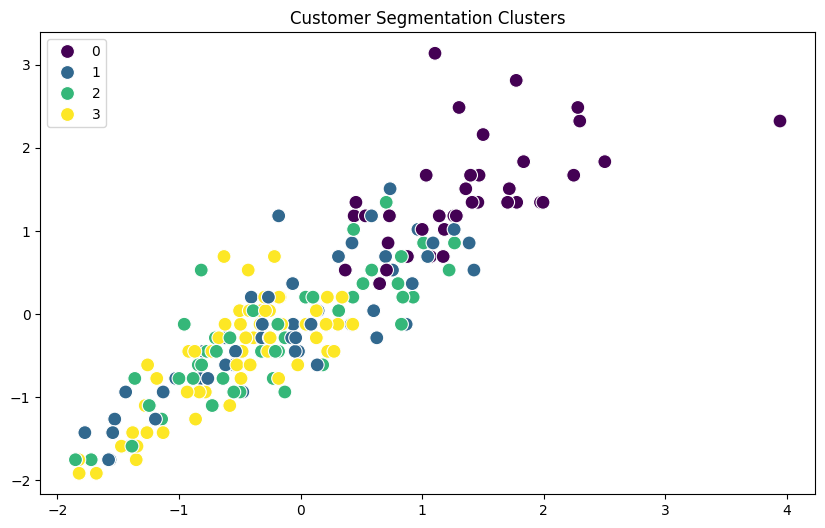

Davies-Bouldin Index: 1.1714695644070179


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Combine data
data = pd.merge(customers, transactions, on='CustomerID')

# Aggregate data for clustering
customer_data = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total transaction value
    'Quantity': 'sum',    # Total quantity bought
    'Price': 'mean',      # Average price
    'Region': 'first',    # Region
}).reset_index()

# Encode categorical data (Region)
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.drop(columns=['CustomerID']))

# Perform clustering (choosing KMeans with 4 clusters as an example)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the data
customer_data['Cluster'] = clusters

# Evaluate using Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, clusters)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_data[:, 0], y=scaled_data[:, 1],
    hue=clusters, palette='viridis', s=100
)
plt.title('Customer Segmentation Clusters')
plt.show()

# Output results and metrics
print(f'Davies-Bouldin Index: {db_index}')
customer_data.to_csv('YourName_Clustering.csv', index=False)